# 1. EXTRACT, TRANSFORM, LOAD (ETL)

## a. Extracting data from sources

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import pandas as pd
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## b. Transforming data to fit analytic needs

In [3]:
# Rename kolom agar rapi
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Parsing tanggal
df['order_date_(dateorders)'] = pd.to_datetime(df['order_date_(dateorders)'])
df['shipping_date_(dateorders)'] = pd.to_datetime(df['shipping_date_(dateorders)'])

# Feature engineering
df['shipping_delay'] = (
    df['shipping_date_(dateorders)'] - df['order_date_(dateorders)']
).dt.days

df['order_month'] = df['order_date_(dateorders)'].dt.to_period('M').astype(str)

# Konversi numerik penting
numeric_cols = ['sales','order_item_quantity','benefit_per_order','order_profit_per_order']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Standarisasi variabel kategorikal
df['market'] = df['market'].str.upper()
df['order_status'] = df['order_status'].str.upper()
df['customer_segment'] = df['customer_segment'].str.title()

# Indikator keterlambatan
df['is_late'] = (df['shipping_delay'] > 0).astype(int)

## c. Loading data into business systems

In [4]:
df_etl = df

# 2. DATA CLEANING

## a. Summarizing data

In [5]:
df_etl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   type                           180519 non-null  object        
 1   days_for_shipping_(real)       180519 non-null  int64         
 2   days_for_shipment_(scheduled)  180519 non-null  int64         
 3   benefit_per_order              180519 non-null  float64       
 4   sales_per_customer             180519 non-null  float64       
 5   delivery_status                180519 non-null  object        
 6   late_delivery_risk             180519 non-null  int64         
 7   category_id                    180519 non-null  int64         
 8   category_name                  180519 non-null  object        
 9   customer_city                  180519 non-null  object        
 10  customer_country               180519 non-null  object        
 11  

In [6]:
df_etl.describe()

,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_date_(dateorders),order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_zipcode,product_card_id,product_category_id,product_description,product_price,product_status,shipping_date_(dateorders),shipping_delay,is_late
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0,180519,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,2016-06-12 17:47:04.669868544,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0,2016-06-16 05:45:23.202433024,3.471856,0.946061
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,2015-01-01 00:00:00,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0,2015-01-03 00:00:00,0.000000,0.000000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,2015-09-21 13:49:00,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0,2015-09-25 06:59:00,2.000000,1.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,2016-06-11 13:06:00,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0,2016-06-15 08:32:00,3.000000,1.000000
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,2017-03-01 08:42:00,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0,2017-03-04 21:29:00,5.000000,1.000000
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,2018-01-31 23:38:00,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0,2018-02-06 22:14:00,6.000000,1.000000
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,NaN,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0,NaN,1.670471,0.225898


In [7]:
df_etl.isna().sum()
df_etl.isna().sum().to_frame('missing_values')

,missing_values
type,0
days_for_shipping_(real),0
days_for_shipment_(scheduled),0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [8]:
df_etl.isna().sum()[df_etl.isna().sum() > 0]

customer_lname              8
customer_zipcode            3
order_zipcode          155679
product_description    180519
dtype: int64

## b. Finding & fixing flawed data

In [9]:
# Missing value handling (SAFE & future-proof)
df_etl['customer_lname'] = df_etl['customer_lname'].fillna("Unknown")
df_etl['customer_zipcode'] = df_etl['customer_zipcode'].fillna(
    df_etl['customer_zipcode'].mode()[0]
)

# Drop kolom missing besar
df_etl = df_etl.drop(columns=['product_description'])

## c. Converting data types

In [10]:
df_etl['late_delivery_risk'] = df_etl['late_delivery_risk'].astype('category')
df_etl['order_status'] = df_etl['order_status'].astype('category')
df_etl.dtypes[['late_delivery_risk','order_status']]

late_delivery_risk    category
order_status          category
dtype: object

## d. Adapting string variables

In [11]:
df_etl['customer_city'] = df_etl['customer_city'].str.title()
df_etl['market'] = df_etl['market'].str.upper()
df_etl[['customer_city','market']].head(10)

,customer_city,market
0,Caguas,PACIFIC ASIA
1,Caguas,PACIFIC ASIA
2,San Jose,PACIFIC ASIA
3,Los Angeles,PACIFIC ASIA
4,Caguas,PACIFIC ASIA
5,Tonawanda,PACIFIC ASIA
6,Caguas,PACIFIC ASIA
7,Miami,PACIFIC ASIA
8,Caguas,PACIFIC ASIA
9,San Ramon,PACIFIC ASIA


# 3. EXPLORATORY DATA ANALYSIS (EDA)

## a. Implementing EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

## b. Single variable analysis (Histogram)

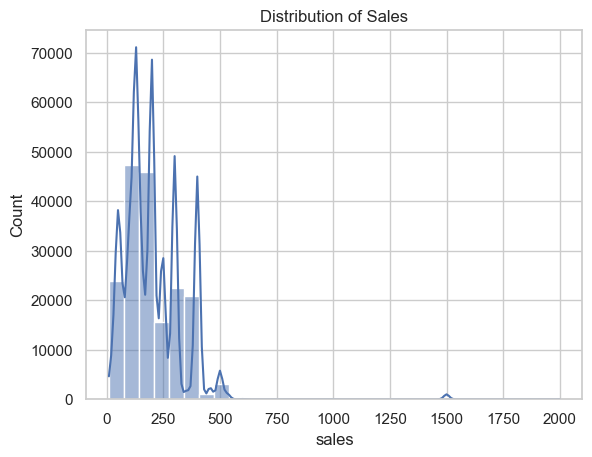

In [13]:
sns.histplot(df_etl['sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()

# c. Two variables analysis (Boxplot)

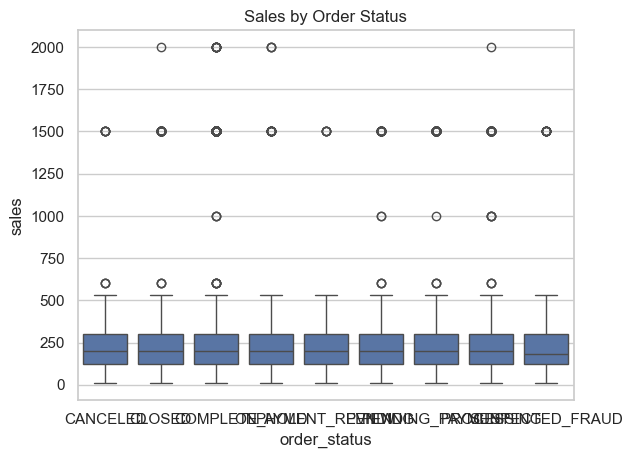

In [14]:
sns.boxplot(x='order_status', y='sales', data=df_etl)
plt.title("Sales by Order Status")
plt.show()

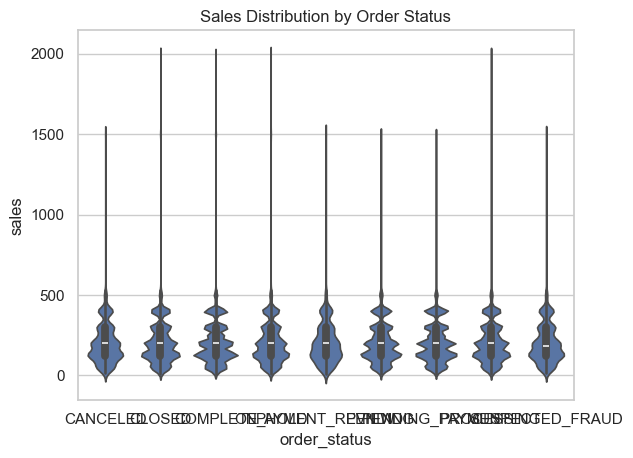

In [15]:
sns.violinplot(x='order_status', y='sales', data=df_etl)
plt.title("Sales Distribution by Order Status")
plt.show()

## d. Multiple variables analysis (Bar)

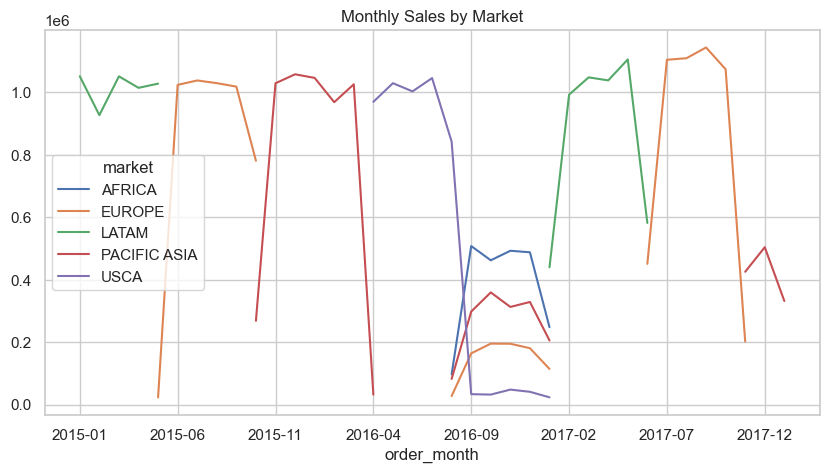

In [16]:
pivot = df_etl.pivot_table(
    values='sales',
    index='order_month',
    columns='market',
    aggfunc='sum'
)

pivot.plot(figsize=(10,5))
plt.title("Monthly Sales by Market")
plt.show()

# 4. LINEAR REGRESSION FOR BUSINESS

## a. Implementing linear regression

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import statsmodels.api as sm
X = df_etl[['order_item_quantity',
            'order_item_product_price',
            'order_item_discount',
            'days_for_shipping_(real)']]

y = df_etl['sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 5.865e+05
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        12:27:27   Log-Likelihood:            -8.9978e+05
No. Observations:              180519   AIC:                         1.800e+06
Df Residuals:                  180514   BIC:                         1.800e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## b. Checking assumptions

In [18]:
# Normalitas (Residual)
from statsmodels.stats.stattools import jarque_bera

jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(model.resid)
jb_stat, jb_pvalue

(849183.4784013211, 0.0)

In [19]:
# Homoskedastisitas
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
dict(zip(labels, bp_test))

{'LM Stat': 34027.35306310583,
 'LM p-value': 0.0,
 'F Stat': 10482.532177209261,
 'F p-value': 0.0}

In [20]:
# Autokorelasi (Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

0.8833637362083911

In [21]:
# Multikolinearitas (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variable"] = X.columns
vif

,VIF,variable
0,11.679821,const
1,1.522629,order_item_quantity
2,1.990295,order_item_product_price
3,1.545510,order_item_discount
4,1.000007,days_for_shipping_(real)


## c. Interpreting model

Koefisien (+) = menaikkan sales, p-value < 0.05 = signifikan

## d. Refining data

In [22]:
import statsmodels.api as sm

X = sm.add_constant(df_etl[['order_item_quantity']])
y = df_etl['sales']

model_simple = sm.OLS(y, X).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        12:27:45   Log-Likelihood:            -1.1369e+06
No. Observations:              180519   AIC:                         2.274e+06
Df Residuals:                  180517   BIC:                         2.274e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 183.1619    

# 5. CLUSTER ANALYSIS

## a. Explaining clustering

Clustering adalah metode unsupervised learning untuk mengelompokkan data berdasarkan kemiripan karakteristik tanpa label awal. Dalam konteks supply chain, clustering digunakan untuk mengelompokkan pesanan berdasarkan pola penjualan dan kuantitas guna mendukung pengambilan keputusan logistik dan inventori.

## b. K-Means

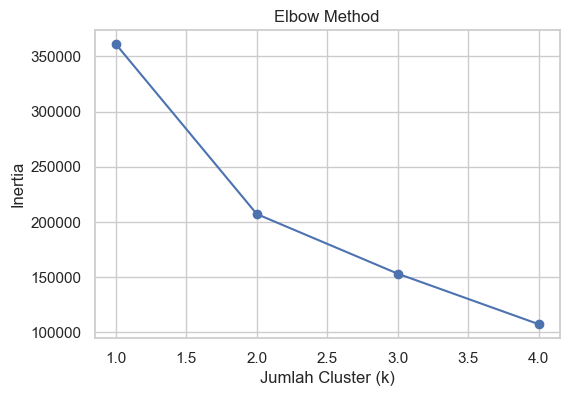

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel baru untuk clustering
cluster_data = df_etl[['order_item_total', 'order_item_discount']]

# Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data)

# Elbow Method
inertia = []
K = range(1, 5)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [24]:
# KMeans dengan k terpilih (3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_etl['cluster_kmeans'] = kmeans.fit_predict(scaled)

# Urutkan cluster berdasarkan rata-rata 'order_item_total'
cluster_mean = df_etl.groupby('cluster_kmeans')['order_item_total'].mean().sort_values()

# Mapping cluster ke urutan logis
cluster_mapping = {old: new for new, old in enumerate(cluster_mean.index, start=1)}
df_etl['cluster_ordered'] = df_etl['cluster_kmeans'].map(cluster_mapping)

# Label cluster
cluster_labels = {1:'Low Value Orders', 2:'Medium Value Orders', 3:'High Value Orders'}
df_etl['cluster_label'] = df_etl['cluster_ordered'].map(cluster_labels)

# Ringkasan cluster
cluster_summary = df_etl.groupby('cluster_label')[['order_item_total','order_item_discount']].mean().round(2)
print(cluster_summary)

                     order_item_total  order_item_discount
cluster_label                                             
High Value Orders              316.37                14.84
Low Value Orders               117.26                12.70
Medium Value Orders            288.96                58.47


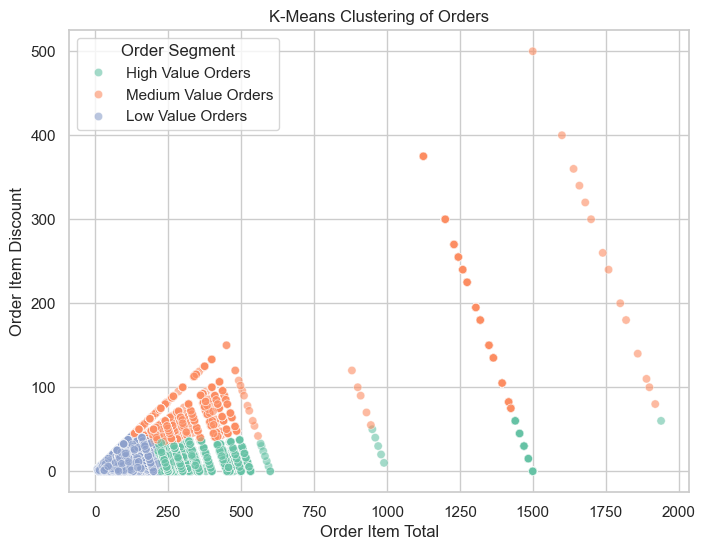

In [25]:
# Visualisasi
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_etl,
    x='order_item_total',
    y='order_item_discount',
    hue='cluster_label',
    palette='Set2',
    alpha=0.6
)
plt.title('K-Means Clustering of Orders')
plt.xlabel('Order Item Total')
plt.ylabel('Order Item Discount')
plt.legend(title='Order Segment')
plt.show()

## c. Hierarchical clustering

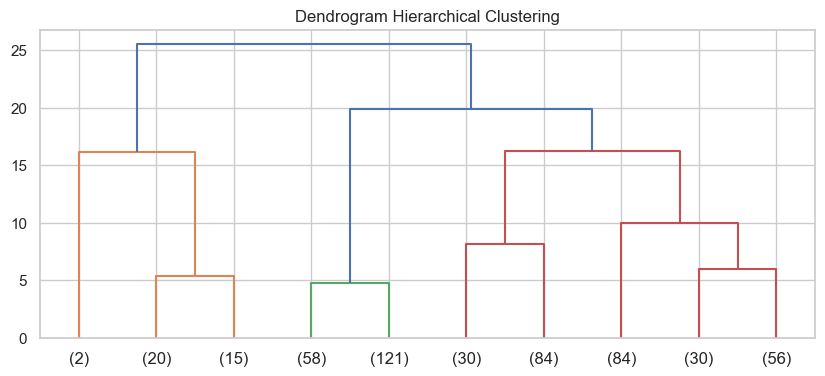

              order_item_total  order_item_discount
cluster_hier                                       
1                       387.98                69.00
2                        86.69                 6.72
3                       228.09                23.13


In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Ambil sampel kecil untuk dendrogram (misal 500 data)
df_hier = df_etl[['order_item_total', 'order_item_discount']].sample(n=500, random_state=42)

# Scaling
scaler = StandardScaler()
scaled_hier = scaler.fit_transform(df_hier)

# Linkage
linked = linkage(scaled_hier, method='ward')

# Dendrogram
plt.figure(figsize=(10,4))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrogram Hierarchical Clustering')
plt.show()

# Membuat cluster, misal 3 cluster sama seperti KMeans
df_hier['cluster_hier'] = fcluster(linked, 3, criterion='maxclust')

# Rata-rata per cluster
cluster_summary_hier = df_hier.groupby('cluster_hier')[['order_item_total','order_item_discount']].mean().round(2)
print(cluster_summary_hier)


# 6. TIME SERIES ANALYSIS

## a. Linear regression time series

In [27]:
import statsmodels.api as sm
ts = df_etl.groupby('order_month')['sales'].sum().reset_index()
ts['t'] = range(len(ts))

X_ts = sm.add_constant(ts['t'])
model_ts = sm.OLS(ts['sales'], X_ts).fit()
print(model_ts.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.835
Date:                Mon, 12 Jan 2026   Prob (F-statistic):             0.0346
Time:                        12:28:27   Log-Likelihood:                -493.23
No. Observations:                  37   AIC:                             990.5
Df Residuals:                      35   BIC:                             993.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+06   4.94e+04     22.030      0.0

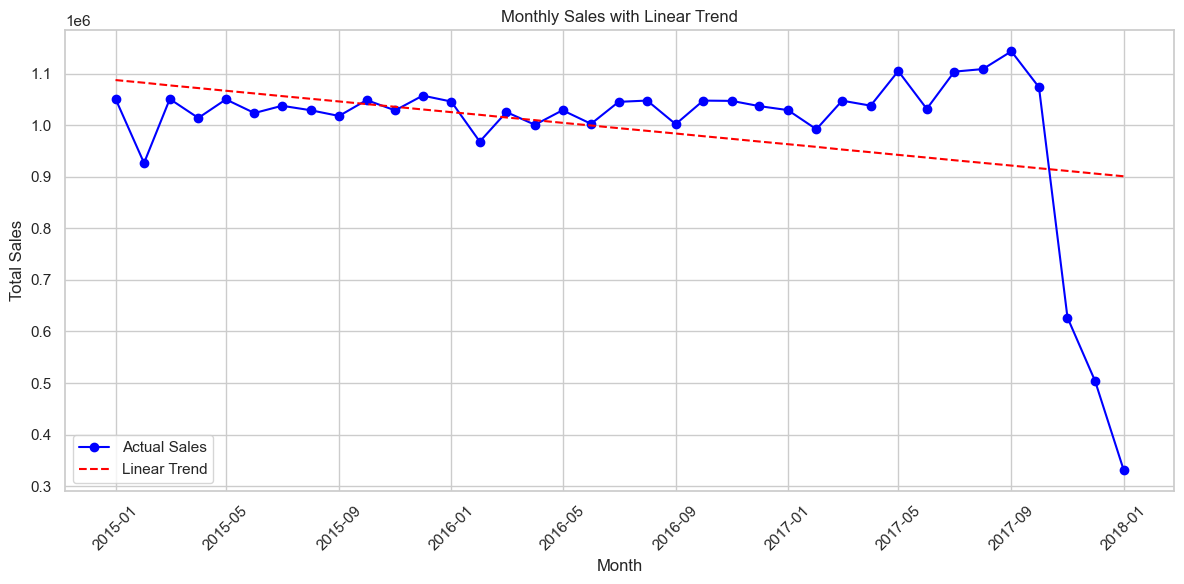

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan order_month sudah datetime
ts = df_etl.groupby('order_month')['sales'].sum().reset_index()
ts['order_month'] = pd.to_datetime(ts['order_month'])
ts['t'] = range(len(ts))

# Tambahkan kolom prediksi linear trend
ts['linear_trend'] = 1.088e6 - 5186.6251 * ts['t']

# Line chart
plt.figure(figsize=(12,6))
plt.plot(ts['order_month'], ts['sales'], marker='o', color='blue', label='Actual Sales')
plt.plot(ts['order_month'], ts['linear_trend'], color='red', linestyle='--', label='Linear Trend')

plt.title('Monthly Sales with Linear Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## b. Key elements

Trend

Seasonality

Noise

## c. ARIMA

In [29]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(ts['sales'], order=(1,1,1))
arima_model = arima.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -463.739
Date:                Mon, 12 Jan 2026   AIC                            933.477
Time:                        12:28:40   BIC                            938.228
Sample:                             0   HQIC                           935.135
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7598      2.437      0.312      0.755      -4.017       5.537
ma.L1         -0.7415      2.460     -0.301      0.763      -5.563       4.080
sigma2      8.156e+09   6.23e-09   1.31e+18      0.000    8.16e+09    8.16e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               193.23
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               6.60   Skew:                            -2.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+33. Standard errors may be unstable.
"""

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


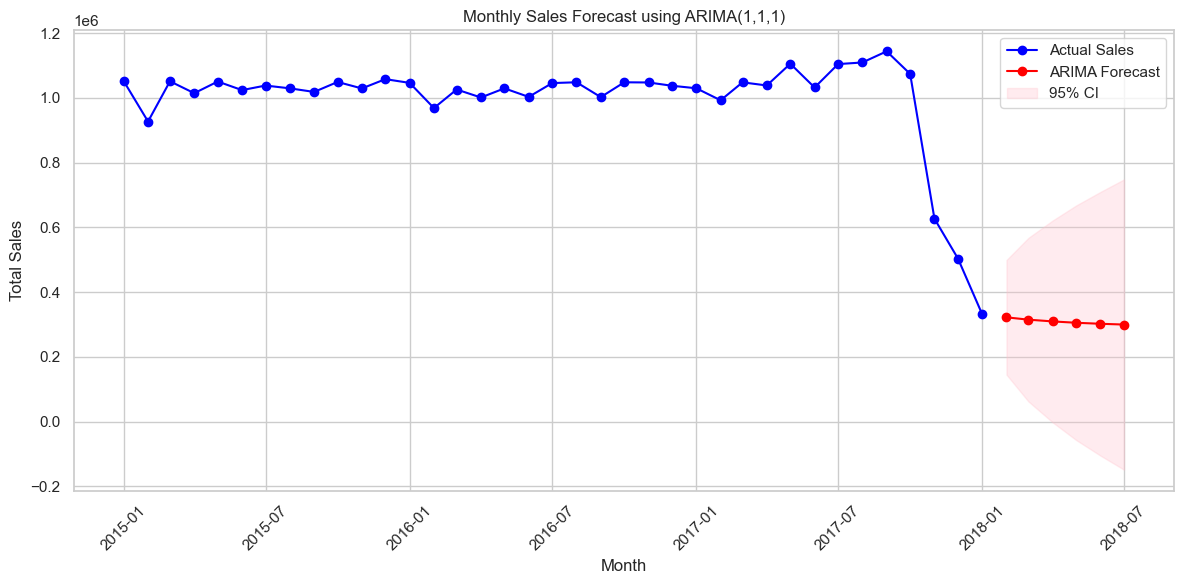

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Pastikan order_month datetime
ts = df_etl.groupby('order_month')['sales'].sum().reset_index()
ts['order_month'] = pd.to_datetime(ts['order_month'])
ts.set_index('order_month', inplace=True)

# Fit ARIMA(1,1,1)
arima = ARIMA(ts['sales'], order=(1,1,1))
arima_model = arima.fit()

# Forecast 6 bulan ke depan
forecast_steps = 6
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts['sales'], label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_index, forecast_mean, label='ARIMA Forecast', color='red', marker='o')
plt.fill_between(forecast_index, forecast_ci['lower sales'], forecast_ci['upper sales'], color='pink', alpha=0.3, label='95% CI')

plt.title('Monthly Sales Forecast using ARIMA(1,1,1)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 7. VISUALIZING DATA STORY

## a & b. Plotly interactive

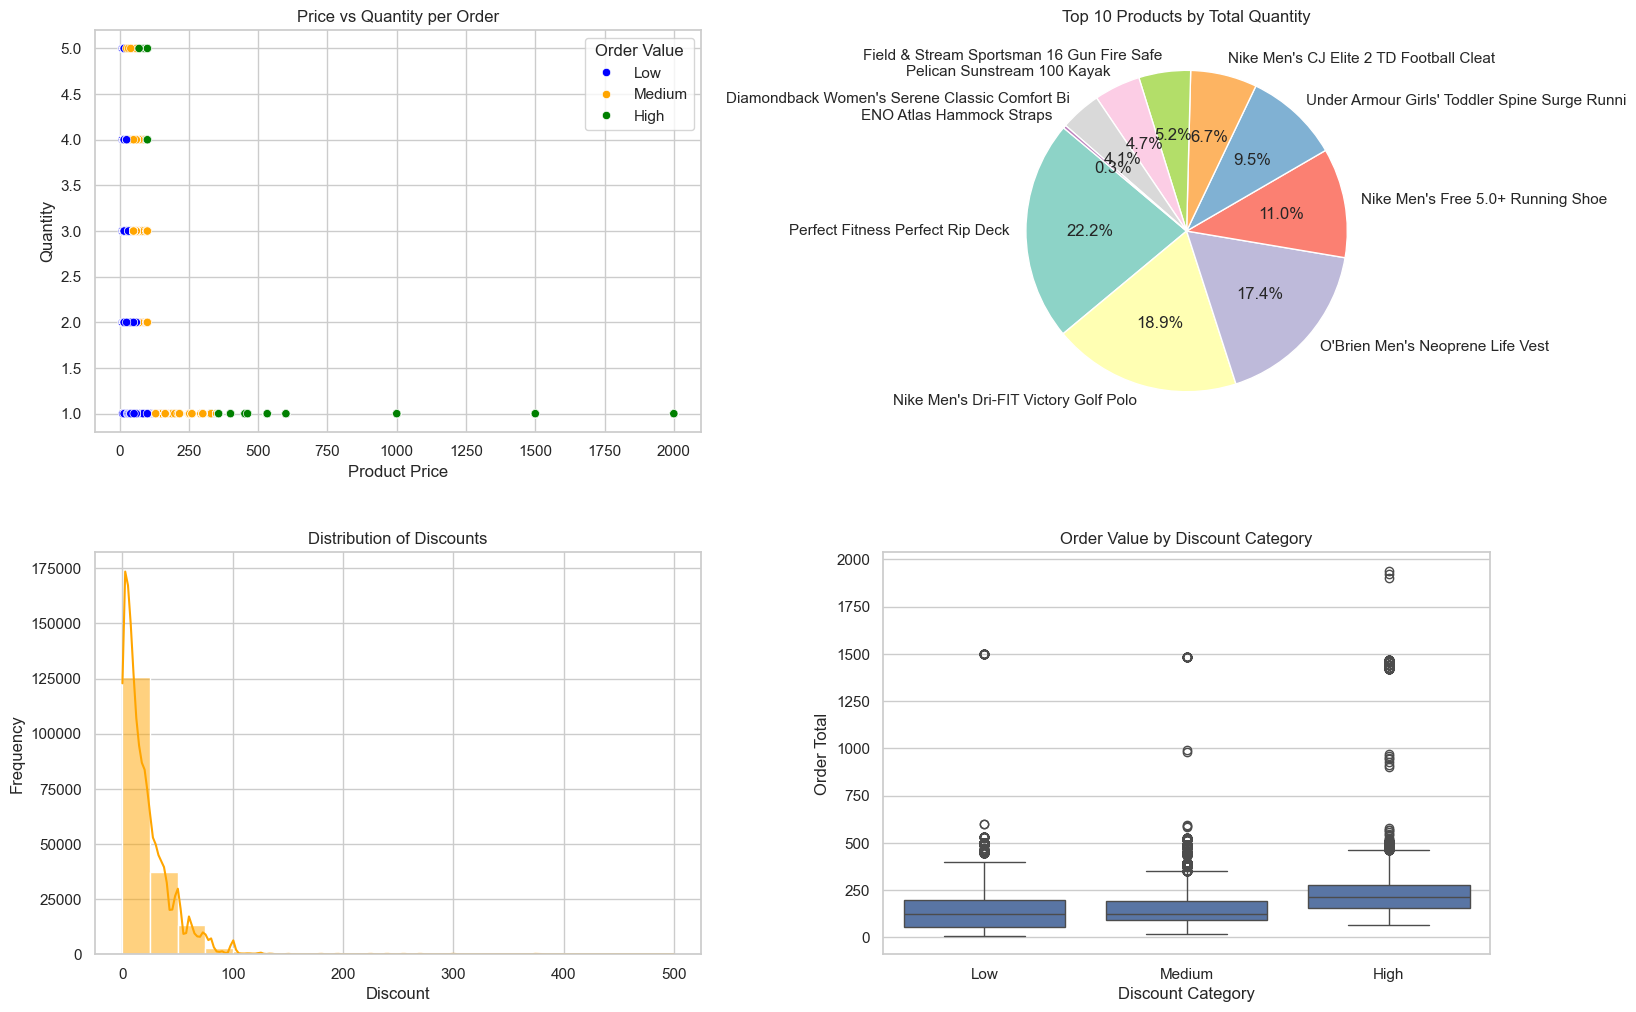

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Rename columns agar lebih Python-friendly
df_etl = df_etl.rename(columns={
    'Order Item Total': 'order_item_total',
    'Order Item Product Price': 'order_item_product_price',
    'Order Item Quantity': 'order_item_quantity',
    'Order Item Discount': 'order_item_discount',
    'Product Name': 'product_name'
})

# Buat kategori order_value dan discount_category
df_etl['order_value_category'] = pd.cut(df_etl['order_item_total'],
                                        bins=[0, 100, 300, 10000],
                                        labels=['Low','Medium','High'])
df_etl['discount_category'] = pd.cut(df_etl['order_item_discount'], 
                                     bins=[-1,5,20,100], 
                                     labels=['Low','Medium','High'])

# Buat figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Scatter plot: Price vs Quantity
sns.scatterplot(
    x='order_item_product_price',
    y='order_item_quantity',
    hue='order_value_category',
    palette={'Low':'blue', 'Medium':'orange', 'High':'green'},
    data=df_etl,
    ax=axes[0,0]
)
axes[0,0].set_title('Price vs Quantity per Order')
axes[0,0].set_xlabel('Product Price')
axes[0,0].set_ylabel('Quantity')
axes[0,0].legend(title='Order Value')

# 2. Pie chart: Total Quantity per Product (top 10)
# Hitung total quantity per product
quantity_per_product = df_etl.groupby('product_name')['order_item_quantity'].sum().sort_values(ascending=False)

top10_products = quantity_per_product.head(10)  # ambil 10 produk teratas
axes[0,1].pie(
    top10_products.values,
    labels=top10_products.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3', 10)
)
axes[0,1].set_title('Top 10 Products by Total Quantity')


# 3. Histogram: Distribution of Discounts
sns.histplot(
    df_etl['order_item_discount'],
    bins=20,
    kde=True,
    color='orange',
    ax=axes[1,0]
)
axes[1,0].set_title('Distribution of Discounts')
axes[1,0].set_xlabel('Discount')
axes[1,0].set_ylabel('Frequency')

# 4. Boxplot: Order Total per Discount Category
sns.boxplot(
    x='discount_category',
    y='order_item_total',
    data=df_etl,
    ax=axes[1,1]
)
axes[1,1].set_title('Order Value by Discount Category')
axes[1,1].set_xlabel('Discount Category')
axes[1,1].set_ylabel('Order Total')

plt.show()

## c. Geo-mapping (Folium)

In [ ]:
pip install folium

     ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
     -------------------------------------  112.6/113.4 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 113.4/113.4 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
     ---------------------------------------- 93.9/93.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
print(df_etl.columns.tolist())

['type', 'days_for_shipping_(real)', 'days_for_shipment_(scheduled)', 'benefit_per_order', 'sales_per_customer', 'delivery_status', 'late_delivery_risk', 'category_id', 'category_name', 'customer_city', 'customer_country', 'customer_email', 'customer_fname', 'customer_id', 'customer_lname', 'customer_password', 'customer_segment', 'customer_state', 'customer_street', 'customer_zipcode', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date_(dateorders)', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total', 'order_profit_per_order', 'order_region', 'order_state', 'order_status', 'order_zipcode', 'product_card_id', 'product_category_id', 'product_image', 'product_name', 'product_price', 'product_status', 'shipping_date_(dateorders)', 'shipping_mode', 

In [33]:
import folium
from IPython.display import display

# Hitung titik tengah berdasarkan data
lat_center = df_etl['latitude'].mean()
lon_center = df_etl['longitude'].mean()

# Peta dasar
m = folium.Map(location=[lat_center, lon_center], zoom_start=4)

# Contoh random 100 titik untuk menghindari overload
for _, row in df_etl.sample(100).iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=f"Order ID: {row['order_id']}\nCustomer: {row['customer_fname']} {row['customer_lname']}\nSales: {row['sales']}"
        ).add_to(m)

# Tampilkan peta
display(m)

m.save('map_orders.html')

## d. Interactive graphics (Plotly)

In [36]:
pip install nbformat

     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ---------------------------------------- 90.6/90.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
     ---------------------------------------- 67.6/67.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/235.8 kB ? eta -:--:--
     -------------------------------------  235.5/235.8 kB 7.0 MB/s eta 0:00:01
     -------------------------------------- 235.8/235.8 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import plotly.express as px

fig4 = px.box(
    df_etl,
    x='discount_category',
    y='order_item_total',
    color='discount_category',
    title='Order Total by Discount Category'
)
fig4.show(renderer="browser")

# 8. WEB DASHBOARD (DASH)

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.9 MB/s eta 0:00:00


In [ ]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ======================
# LOAD & PREPROCESS DATA
# ======================
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

df.columns = df.columns.str.lower().str.replace(" ", "_")
df['order_date_(dateorders)'] = pd.to_datetime(df['order_date_(dateorders)'])
df['shipping_date_(dateorders)'] = pd.to_datetime(df['shipping_date_(dateorders)'])
df['shipping_delay'] = (df['shipping_date_(dateorders)'] - df['order_date_(dateorders)']).dt.days
df['order_month'] = df['order_date_(dateorders)'].dt.to_period('M').astype(str)

df['customer_lname'] = df['customer_lname'].fillna("Unknown")
df['customer_zipcode'] = df['customer_zipcode'].fillna(df['customer_zipcode'].mode()[0])
df.drop(columns=['product_description'], inplace=True, errors='ignore')

df['late_delivery_risk'] = df['late_delivery_risk'].astype('category')
df['order_status'] = df['order_status'].astype('category')

for col in ['sales','order_item_quantity']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# ======================
# K-MEANS CLUSTERING
# ======================
cluster_data = df[['sales','order_item_quantity']]
scaled = StandardScaler().fit_transform(cluster_data)

df['cluster_kmeans'] = KMeans(n_clusters=3, random_state=42).fit_predict(scaled)
df['cluster_label'] = df['cluster_kmeans'].map({
    0:'Small Customer',
    1:'Medium Customer',
    2:'Large Customer'
})

# ======================
# DASH APP
# ======================
app = Dash(__name__)

def calculate_kpi(data):
    return (
        data['sales'].sum(),
        round(data['shipping_delay'].mean(),1),
        len(data)
    )

def beautify_fig(fig):
    fig.update_layout(
        autosize=True,
        margin=dict(l=10, r=10, t=35, b=10),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        title_font_size=13
    )
    return fig

# ======================
# LAYOUT
# ======================
app.layout = html.Div(
    style={
        'background':'linear-gradient(135deg,#74ebd5,#ACB6E5)',
        'minHeight':'100vh',
        'padding':'12px',
        'fontFamily':'Arial'
    },
    children=[

        html.H2("Supply Chain Dashboard",
                style={'textAlign':'center','color':'white','marginBottom':'10px'}),

        # Dropdown
        html.Div([
            dcc.Dropdown(
                id='dropdown-market',
                options=[{'label':m,'value':m} for m in sorted(df['market'].unique())],
                multi=True,
                placeholder='Filter Market'
            )
        ], style={'width':'45%','margin':'auto','marginBottom':'12px'}),

        # KPI Cards
        html.Div(id='kpi-cards',
            style={
                'display':'grid',
                'gridTemplateColumns':'repeat(3,1fr)',
                'gap':'10px',
                'marginBottom':'12px'
            }
        ),

        # 2x2 GRID GRAPH
        html.Div(
            style={
                'display':'grid',
                'gridTemplateColumns':'repeat(2,1fr)',
                'gap':'12px'
            },
            children=[
                html.Div(dcc.Graph(id='pie-order-status', style={'height':'240px'}, config={'displayModeBar':False}),
                         style={'background':'rgba(255,255,255,0.9)','borderRadius':'10px','padding':'5px'}),

                html.Div(dcc.Graph(id='line-monthly-sales', style={'height':'240px'}, config={'displayModeBar':False}),
                         style={'background':'rgba(255,255,255,0.9)','borderRadius':'10px','padding':'5px'}),

                html.Div(dcc.Graph(id='bar-market-sales', style={'height':'240px'}, config={'displayModeBar':False}),
                         style={'background':'rgba(255,255,255,0.9)','borderRadius':'10px','padding':'5px'}),

                html.Div(dcc.Graph(id='scatter-cluster', style={'height':'240px'}, config={'displayModeBar':False}),
                         style={'background':'rgba(255,255,255,0.9)','borderRadius':'10px','padding':'5px'}),
            ]
        )
    ]
)

# ======================
# CALLBACK
# ======================
@app.callback(
    Output('pie-order-status','figure'),
    Output('line-monthly-sales','figure'),
    Output('bar-market-sales','figure'),
    Output('scatter-cluster','figure'),
    Output('kpi-cards','children'),
    Input('dropdown-market','value')
)
def update_dashboard(selected_markets):

    dff = df.copy()
    if selected_markets:
        dff = dff[dff['market'].isin(selected_markets)]

    total_sales, avg_delay, total_orders = calculate_kpi(dff)

    kpis = [
        html.Div(f"Total Sales\n{total_sales:,.0f}",
                 style={'background':'rgba(255,255,255,0.85)','borderRadius':'10px','padding':'10px','textAlign':'center'}),
        html.Div(f"Avg Shipping Delay\n{avg_delay} days",
                 style={'background':'rgba(255,255,255,0.85)','borderRadius':'10px','padding':'10px','textAlign':'center'}),
        html.Div(f"Total Orders\n{total_orders}",
                 style={'background':'rgba(255,255,255,0.85)','borderRadius':'10px','padding':'10px','textAlign':'center'})
    ]

    fig_pie = beautify_fig(px.pie(dff, names='order_status', title='Order Status'))
    fig_line = beautify_fig(px.line(dff.groupby('order_month',as_index=False)['sales'].sum(),
                                    x='order_month', y='sales', title='Monthly Sales'))
    fig_bar = beautify_fig(px.bar(dff.groupby('market',as_index=False)['sales'].sum(),
                                  x='market', y='sales', title='Sales by Market'))
    fig_scatter = beautify_fig(px.scatter(dff, x='sales', y='order_item_quantity',
                                          color='cluster_label', title='Customer Segmentation'))

    return fig_pie, fig_line, fig_bar, fig_scatter, kpis

# ======================
# RUN
# ======================
if __name__ == "__main__":
    app.run(debug=True, host="127.0.0.1", port=8050)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on
